In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
df_movie = pd.read_csv('movies.dat', sep='::', engine='python', encoding='latin-1')
df_movie.columns = ['Movie_ID', 'Movie_Name', 'Genre']
df_movie.head()

,Movie_ID,Movie_Name,Genre
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [21]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie_ID    3882 non-null   int64 
 1   Movie_Name  3882 non-null   object
 2   Genre       3882 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [22]:
df_rating = pd.read_csv("ratings.dat",sep='::', engine='python',encoding='latin-1')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [23]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218507 entries, 0 to 218506
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   ID         218507 non-null  int64
 1   MovieID    218507 non-null  int64
 2   Ratings    218507 non-null  int64
 3   TimeStamp  218507 non-null  int64
dtypes: int64(4)
memory usage: 6.7 MB


In [24]:
df_rating=df_rating.drop('TimeStamp',axis=1)

In [25]:
df_user = pd.read_csv("users.dat",sep='::',engine='python',encoding='latin-1')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
encoder = LabelEncoder()
df_user['Gender']= encoder.fit_transform(df_user['Gender'])
df_user.head()


,UserID,Gender,Age,Occupation,Zip-code
0,2,1,56,16,70072
1,3,1,25,15,55117
2,4,1,45,7,02460
3,5,1,25,20,55455
4,6,0,50,9,55117


In [26]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6039 non-null   int64 
 1   Gender      6039 non-null   int64 
 2   Age         6039 non-null   int64 
 3   Occupation  6039 non-null   int64 
 4   Zip-code    6039 non-null   object
dtypes: int64(4), object(1)
memory usage: 236.0+ KB


In [27]:
df_user=df_user.drop(["Occupation","Zip-code"],axis=1)

In [28]:
df_data=pd.concat([df_movie,df_rating,df_user],axis=1)
df_data.dropna()
df_data.head()

,Movie_ID,Movie_Name,Genre,ID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,0.0,50.0


In [29]:
df_final=df_data.dropna()

In [30]:
df_final.shape

(3882, 9)

<ipython-input-31-f9d6856a418f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), annot=True)


<Axes: >

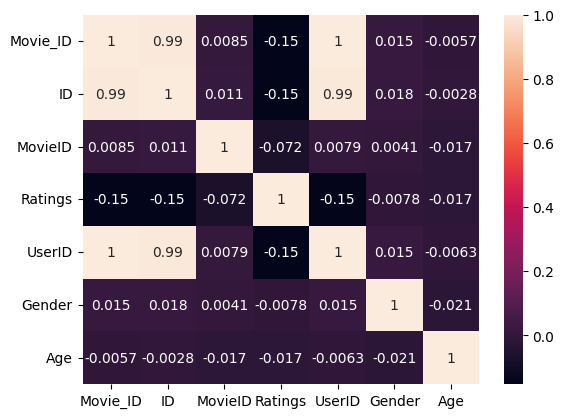

In [31]:
sns.heatmap(df_final.corr(), annot=True)

In [32]:
X=df_final.drop(["Ratings","Movie_ID","Movie_Name","Genre"],axis=1)
Y=df_final['Ratings']

In [33]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data,
                         columns=X.columns)
scaled_df.head()

,ID,MovieID,UserID,Gender,Age
0,0.0,0.167046,0.000000,1.0,1.000000
1,0.0,0.231081,0.000258,1.0,0.436364
2,0.0,0.862313,0.000515,1.0,0.800000
3,0.0,0.595799,0.000773,1.0,0.436364
4,0.0,0.302708,0.001031,0.0,0.890909


In [34]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3)

In [35]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
error=mean_squared_error(Y_test,Y_pred)
print(f"Error: {error:.2f}")

Error: 1.14
